<a href="https://colab.research.google.com/github/afsrmega/TelecomChallenge/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

df = pd.read_json(url)

customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

final_df = pd.concat([df[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)


final_df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


## LIMPIEZA

In [34]:
print(final_df.dtypes)


customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object


In [35]:
final_df['Charges.Total'] = pd.to_numeric(final_df['Charges.Total'], errors='coerce')
final_df['Charges.Monthly'] = pd.to_numeric(final_df['Charges.Monthly'], errors='coerce')

print(final_df.dtypes)


customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total       float64
dtype: object


In [36]:
final_df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [37]:
final_df['Charges.Total'] = final_df['Charges.Total'].fillna(0)
final_df['Charges.Monthly'] = final_df['Charges.Monthly'].fillna(0)


In [38]:
print(final_df.isnull().sum())


customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [39]:
final_df.duplicated().sum()

np.int64(0)

#🔧 Transformación

In [40]:
text_cols = final_df.select_dtypes(include='object').columns
for col in text_cols:
    final_df[col] = final_df[col].str.strip().str.lower().str.replace(' ', '_')

In [41]:
final_df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,yes,no,yes,yes,no,one_year,yes,mailed_check,65.60,593.30
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,no,yes,month-to-month,no,mailed_check,59.90,542.40
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber_optic,...,no,yes,no,no,no,month-to-month,yes,electronic_check,73.90,280.85
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber_optic,...,yes,yes,no,yes,yes,month-to-month,yes,electronic_check,98.00,1237.85
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber_optic,...,no,no,yes,yes,no,month-to-month,yes,mailed_check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-lutyd,no,female,0,no,no,13,yes,no,dsl,...,no,no,yes,no,no,one_year,no,mailed_check,55.15,742.90
7263,9992-rramn,yes,male,0,yes,no,22,yes,yes,fiber_optic,...,no,no,no,no,yes,month-to-month,yes,electronic_check,85.10,1873.70
7264,9992-ujoel,no,male,0,no,no,2,yes,no,dsl,...,yes,no,no,no,no,month-to-month,yes,mailed_check,50.30,92.75
7265,9993-lhieb,no,male,0,yes,yes,67,yes,no,dsl,...,no,yes,yes,no,yes,two_year,no,mailed_check,67.85,4627.65


In [42]:
dataframenc = final_df

dataframenc['cuentas_diarias'] = dataframenc['Charges.Monthly']/30

In [43]:
dataframenc

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,cuentas_diarias
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one_year,yes,mailed_check,65.60,593.30,2.186667
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month-to-month,no,mailed_check,59.90,542.40,1.996667
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber_optic,...,yes,no,no,no,month-to-month,yes,electronic_check,73.90,280.85,2.463333
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber_optic,...,yes,no,yes,yes,month-to-month,yes,electronic_check,98.00,1237.85,3.266667
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber_optic,...,no,yes,yes,no,month-to-month,yes,mailed_check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-lutyd,no,female,0,no,no,13,yes,no,dsl,...,no,yes,no,no,one_year,no,mailed_check,55.15,742.90,1.838333
7263,9992-rramn,yes,male,0,yes,no,22,yes,yes,fiber_optic,...,no,no,no,yes,month-to-month,yes,electronic_check,85.10,1873.70,2.836667
7264,9992-ujoel,no,male,0,no,no,2,yes,no,dsl,...,no,no,no,no,month-to-month,yes,mailed_check,50.30,92.75,1.676667
7265,9993-lhieb,no,male,0,yes,yes,67,yes,no,dsl,...,yes,yes,no,yes,two_year,no,mailed_check,67.85,4627.65,2.261667


In [44]:
dataframenc.replace(['', ' ', 'nan', 'none', 'None'], np.nan, inplace=True)

ternary_cols = [
    col for col in dataframenc.columns
    if {'yes', 'no'}.issubset(set(dataframenc[col].dropna().unique()))
]

In [45]:


for col in ternary_cols:
    dataframenc[col] = dataframenc[col].apply(
        lambda x: np.nan if pd.isna(x) else (1 if x == 'yes' else (0 if x == 'no' else 2))
    ).astype('Int8')

dataframenc

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,cuentas_diarias
0,0002-orfbo,0,female,0,1,1,9,1,0,dsl,...,0,1,1,0,one_year,1,mailed_check,65.60,593.30,2.186667
1,0003-mknfe,0,male,0,0,0,9,1,1,dsl,...,0,0,0,1,month-to-month,0,mailed_check,59.90,542.40,1.996667
2,0004-tlhlj,1,male,0,0,0,4,1,0,fiber_optic,...,1,0,0,0,month-to-month,1,electronic_check,73.90,280.85,2.463333
3,0011-igkff,1,male,1,1,0,13,1,0,fiber_optic,...,1,0,1,1,month-to-month,1,electronic_check,98.00,1237.85,3.266667
4,0013-exchz,1,female,1,1,0,3,1,0,fiber_optic,...,0,1,1,0,month-to-month,1,mailed_check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-lutyd,0,female,0,0,0,13,1,0,dsl,...,0,1,0,0,one_year,0,mailed_check,55.15,742.90,1.838333
7263,9992-rramn,1,male,0,1,0,22,1,1,fiber_optic,...,0,0,0,1,month-to-month,1,electronic_check,85.10,1873.70,2.836667
7264,9992-ujoel,0,male,0,0,0,2,1,0,dsl,...,0,0,0,0,month-to-month,1,mailed_check,50.30,92.75,1.676667
7265,9993-lhieb,0,male,0,1,1,67,1,0,dsl,...,1,1,0,1,two_year,0,mailed_check,67.85,4627.65,2.261667


#📊 Carga y análisis

In [46]:
dataframenc.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total,cuentas_diarias
count,7043.0,7267.000000,7267.0,7267.0,7267.000000,7267.0,7267.0,7267.0,7267.0,7267.0,7267.0,7267.0,7267.0,7267.0,7267.000000,7267.000000,7267.000000
mean,0.26537,0.162653,0.484106,0.300124,32.346498,0.902711,0.616348,0.721068,0.779689,0.7779,0.724646,0.819045,0.822623,0.59323,64.720098,2277.182035,2.157337
std,0.441561,0.369074,0.499782,0.458343,24.571773,0.296371,0.656583,0.797706,0.779086,0.779726,0.796705,0.763812,0.762307,0.491265,30.129572,2268.648587,1.004319
min,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.250000,0.000000,0.608333
25%,0.0,0.000000,0.0,0.0,9.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.425000,396.200000,1.180833
50%,0.0,0.000000,0.0,0.0,29.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,70.300000,1389.200000,2.343333
75%,1.0,0.000000,1.0,1.0,55.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,89.875000,3778.525000,2.995833
max,1.0,1.000000,1.0,1.0,72.000000,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,118.750000,8684.800000,3.958333


In [47]:
dataframenc.describe(include='object')

,customerID,gender,InternetService,Contract,PaymentMethod
count,7267,7267,7267,7267,7267
unique,7267,2,3,3,4
top,9995-hotoh,male,fiber_optic,month-to-month,electronic_check
freq,1,3675,3198,4005,2445


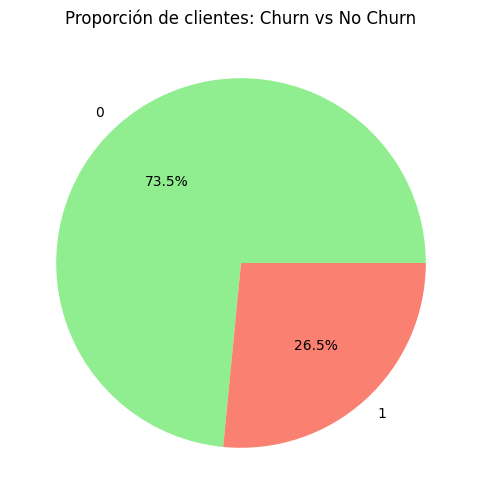

In [48]:


# Contar valores
churn_counts = dataframenc['Churn'].value_counts()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title('Proporción de clientes: Churn vs No Churn')
plt.show()

In [49]:
churn_counts = dataframenc['Churn'].value_counts().sort_index()
print(churn_counts)

Churn
0    5174
1    1869
Name: count, dtype: Int64


/tmp/ipython-input-50-3726998434.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=dataframenc, palette='Set2')


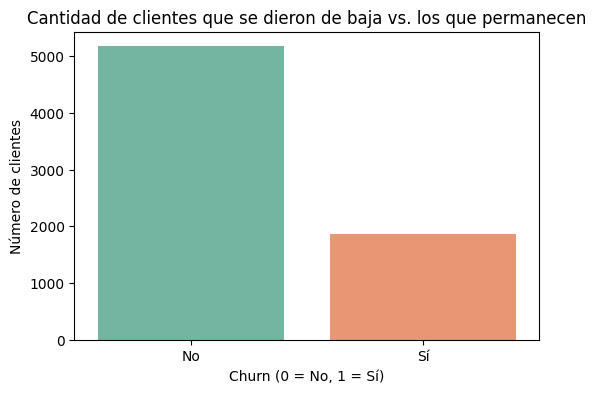

In [50]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=dataframenc, palette='Set2')
plt.title('Cantidad de clientes que se dieron de baja vs. los que permanecen')
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Número de clientes')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

In [51]:
categorical_cols = ['gender', 'Contract', 'PaymentMethod', 'InternetService']
for col in categorical_cols:
    print(f"\nChurn por {col}:")
    churn_rate = pd.crosstab(dataframenc[col], dataframenc['Churn'], normalize='index') * 100
    churn_rate = churn_rate.rename(columns={0: 'No', 1: 'Yes'})
    print(churn_rate.round(2))


Churn por gender:
Churn      No    Yes
gender              
female  73.08  26.92
male    73.84  26.16

Churn por Contract:
Churn              No    Yes
Contract                    
month-to-month  57.29  42.71
one_year        88.73  11.27
two_year        97.17   2.83

Churn por PaymentMethod:
Churn                         No    Yes
PaymentMethod                          
bank_transfer_(automatic)  83.29  16.71
credit_card_(automatic)    84.76  15.24
electronic_check           54.71  45.29
mailed_check               80.89  19.11

Churn por InternetService:
Churn               No    Yes
InternetService              
dsl              81.04  18.96
fiber_optic      58.11  41.89
no               92.60   7.40


In [52]:
numeric_cols = ['Charges.Total', 'tenure', 'Charges.Monthly']

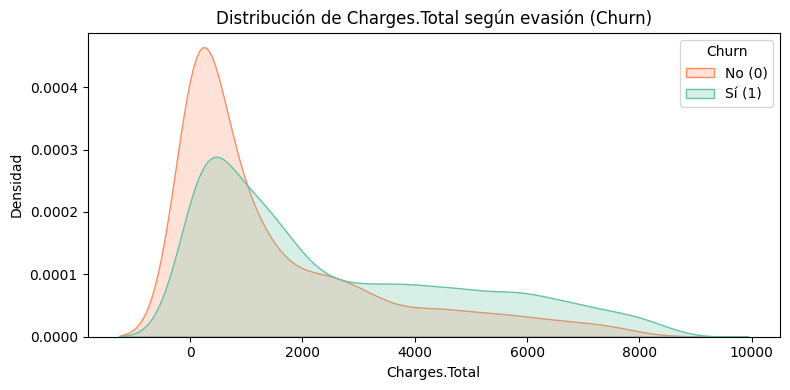

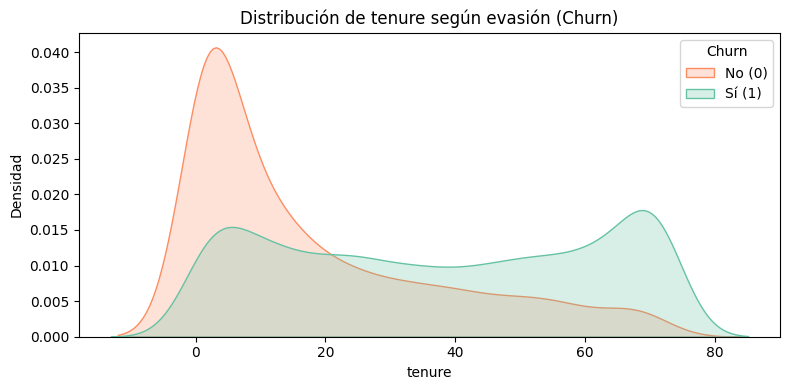

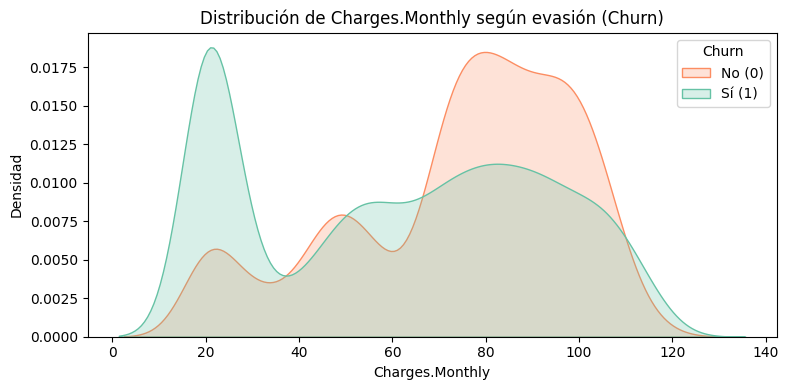

In [53]:


for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=dataframenc, x=col, hue='Churn', fill=True, palette='Set2', common_norm=False)
    plt.title(f'Distribución de {col} según evasión (Churn)')
    plt.xlabel(col)
    plt.ylabel('Densidad')
    plt.legend(title='Churn', labels=['No (0)', 'Sí (1)'])
    plt.tight_layout()
    plt.show()

In [54]:
numericas = dataframenc.select_dtypes(include=['int', 'float', 'Int8'])
correlaciones = numericas.corr()

# Correlación de todas las variables con churn
correlacion_churn = correlaciones['Churn'].sort_values(ascending=False)
print(correlacion_churn)

Churn               1.000000
Charges.Monthly     0.193356
cuentas_diarias     0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
MultipleLines       0.019423
PhoneService        0.011942
Partner            -0.150448
Dependents         -0.164221
Charges.Total      -0.198324
StreamingTV        -0.205742
StreamingMovies    -0.207256
DeviceProtection   -0.281465
OnlineBackup       -0.291449
TechSupport        -0.329852
OnlineSecurity     -0.332819
tenure             -0.352229
Name: Churn, dtype: float64


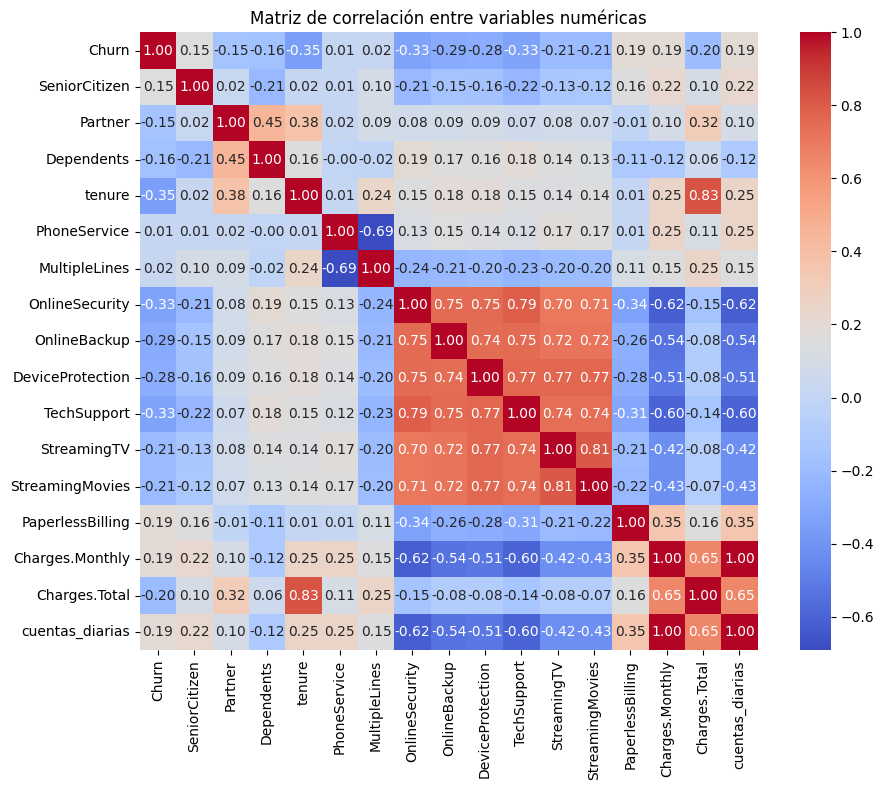

In [55]:


plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de correlación entre variables numéricas')
plt.tight_layout()
plt.show()

#📄Informe final

# Introducción:

 En el presente informe se analiza el fenómeno de evasión de clientes "Churn" en la empresa Telecom X. La evasión representa uno de los principales desafíos para las compañías actuales, ya que implica pérdida de ingresos y aumento en los costos de adquisición de nuevos clientes.

El objetivo de este análisis es identificar patrones, características demográficas y de consumo que diferencien a los clientes que permanecen activos de aquellos que cancelan el servicio. Esto permitirá proponer estrategias basadas en datos para prevenir la deserción y mejorar la retención.

# Limpieza y Tratamiento de Datos:
Los datos fueron importados desde un archivo JSON que contiene información estructurada por cliente, incluyendo atributos demográficos, detalles del servicio, información de facturación y el estado de evasión. La información se encuentra anidada, en algunos casos con niveles de anidación dobles.

Se realizaron las siguientes tareas:

Se importaron los datos desde un archivo JSON. Dado que la información estaba anidada, se realizó una normalización de las columnas correspondientes. Posteriormente, se concatenaron estas columnas, ya que al normalizarlas por separado se dividían en estructuras independientes. Las columnas anidadas fueron: customer, phone, internet y account, siendo esta última una columna con doble nivel de anidación.

Normalización de nombres de columnas: se convirtieron a minúsculas y se reemplazaron espacios por guiones bajos para mayor manejabilidad.

Transformación de valores categóricos: se convirtieron las respuestas “yes” y “no” a valores binarios 1 y 0, y en algunos casos se incorporó un valor 2 para categorías adicionales o valores no reconocidos.

Conversión de columnas numéricas: columnas como Charges.Total fueron convertidas de texto a formato numérico (float), gestionando los valores faltantes con NaN.

Manejo de valores nulos y vacíos: se limpiaron cadenas vacías y representaciones erróneas como 'nan' y 'none', reemplazándolos por np.nan.



# Análisis Exploratorio de Datos
Se analizaron las características generales de la población y se comparó el comportamiento de evasión (Churn) frente a otras variables:

## Distribución General de Churn

Un gráfico de torta y de barras mostró que aproximadamente el 26% de los clientes abandonaron el servicio, mientras el resto permaneció activo.

# Comparación por Categorías
Se observó la relación entre churn y variables como:

### Tipo de contrato:
los clientes con contrato mes a mes mostraron mayores tasas de evasión frente a quienes tenían contratos anuales o bianuales.

### Método de pago:
quienes pagaban mediante facturación electrónica (paperless billing) o tarjetas virtuales mostraron mayor churn.

### Género, dependencia y pareja:
no presentaron correlaciones fuertes, pero sí diferencias sutiles.





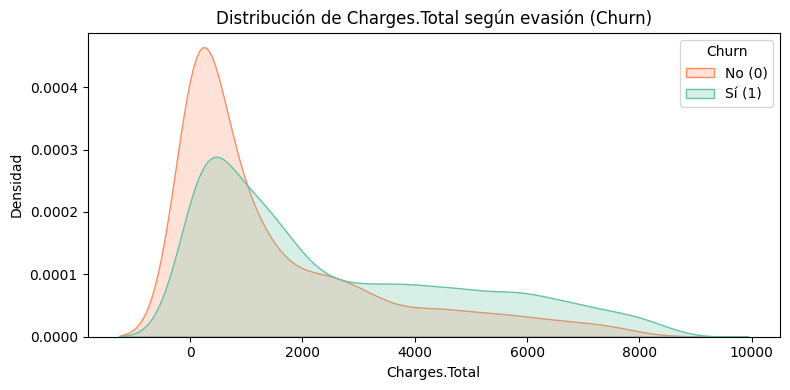

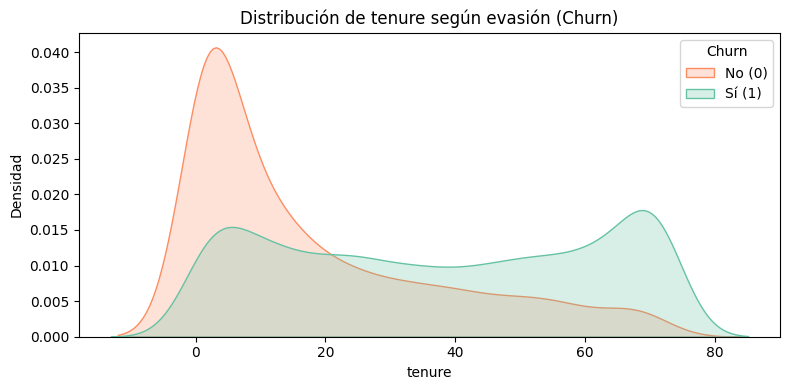

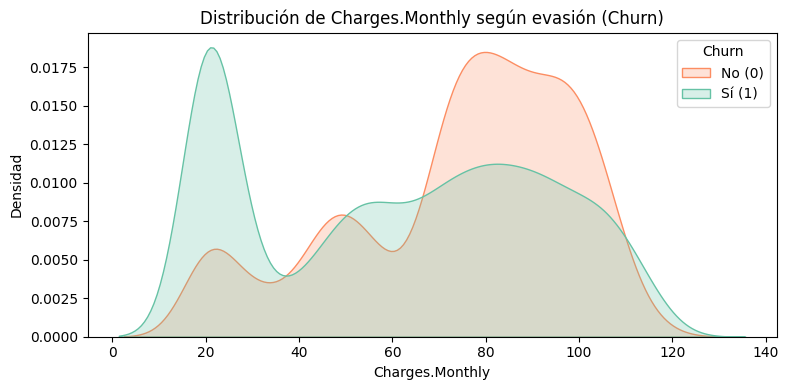

In [56]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=dataframenc, x=col, hue='Churn', fill=True, palette='Set2', common_norm=False)
    plt.title(f'Distribución de {col} según evasión (Churn)')
    plt.xlabel(col)
    plt.ylabel('Densidad')
    plt.legend(title='Churn', labels=['No (0)', 'Sí (1)'])
    plt.tight_layout()
    plt.show()

# Variables Numéricas
Se exploró la distribución de variables como:

### Tiempo de permanencia (tenure):
los clientes con menos meses de permanencia mostraron mayor tendencia al churn.

### Total y mensual de cargos:
quienes pagaban montos más altos mensualmente tendían ligeramente más al abandono, aunque no de forma fuerte.

# Correlación
Este análisis fue el más diciente. La correlación entre variables numéricas y churn evidenció que:

tenure (-0.35), online_security (-0.33) y tech_support (-0.33) son los principales factores protectores.

monthly_charges (+0.19) y paperless_billing (+0.19) están ligeramente asociados al churn.



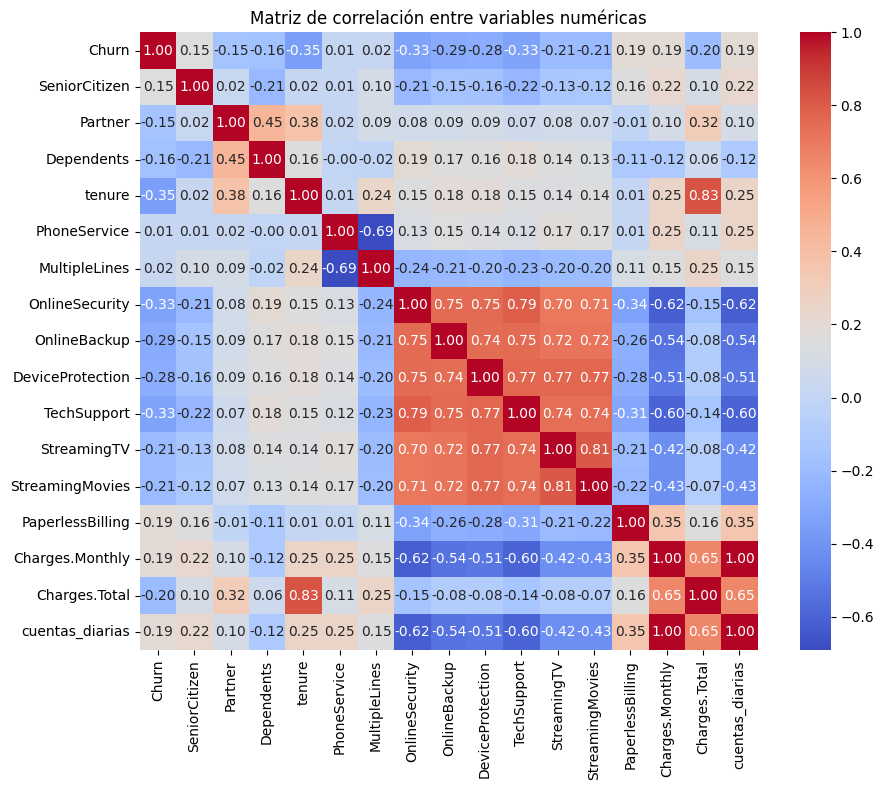

In [57]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de correlación entre variables numéricas')
plt.tight_layout()
plt.show()

# Conclusiones e Insights:
Clientes con mayor permanencia (tenure) son significativamente menos propensos a cancelar el servicio.

La ausencia de seguridad en línea, soporte técnico o respaldo está asociada a una mayor evasión.

Los clientes con facturación electrónica y contratos de corto plazo presentan mayor tasa de churn.

Las tarifas mensuales altas tienen una correlación positiva moderada con la evasión, aunque no son el factor más determinante.

En términos generales, como plan de acción, se podría generar un plan de incentivos para retención para nuevos clientes. Adicionalmente, debería existir, incluso subiendo los precios, servicio técnico, así sea básico para todos. Porque aquellos que no tienen soporte técnico tienden a abandonar con mayor rapidez.

Habría también que analizar otros datos, a partir de allí para dar un servicio técnico óptimo. Lo mismo con Device Protection, podrían existir varios tiers.

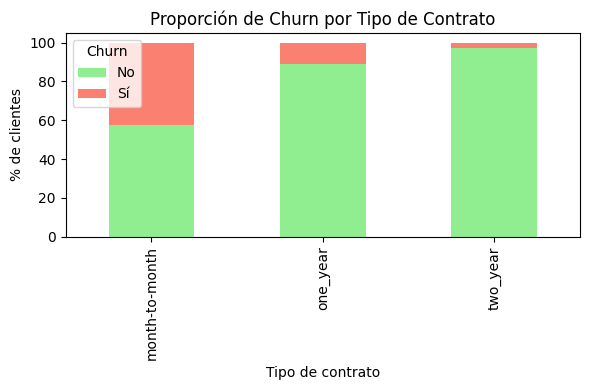

In [58]:
ct = pd.crosstab(dataframenc['Contract'], dataframenc['Churn'], normalize='index') * 100
ct.plot(kind='bar', stacked=True, color=['lightgreen', 'salmon'], figsize=(6,4))
plt.title('Proporción de Churn por Tipo de Contrato')
plt.ylabel('% de clientes')
plt.xlabel('Tipo de contrato')
plt.legend(title='Churn', labels=['No', 'Sí'])
plt.tight_layout()
plt.show()

Se evidencia que hay un deseo por probar sin compromiso, y al probar deciden no tomar el servicio, ya sea porque no lo ven necesario o porque les parece mejor el de la competencia. Por esta razón, valdría la pena nuevamente, tener un acompañamiento más grande al inicio. Y mantenerlo de manera más leve durante el resto de meses.

# Recomendaciones:


Se podría revisar la correlación de las variables:

### OnlineBackup: -0.291
### OnlineSecurity: -0.333

Estos factores parecen ser un diferencial importante frente a la competencia. Podría suceder que existan otras alternativas en el mercado, incluso si son más costosas. Por ello, sugeriría complementar el análisis con factores externos al mercado, no limitarlo únicamente a características internas del producto.

Adicionalmente, aunque el soporte técnico es importante, vale la pena implementar un acompañamiento o servicio al cliente frecuente, especialmente durante los primeros meses, con el fin de generar mayor fidelización.

EXTRA

/tmp/ipython-input-59-696351694.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataframenc, x='Churn', y='n_servicios', palette='pastel')


Text(0.5, 1.0, 'Cantidad de servicios contratados según churn')

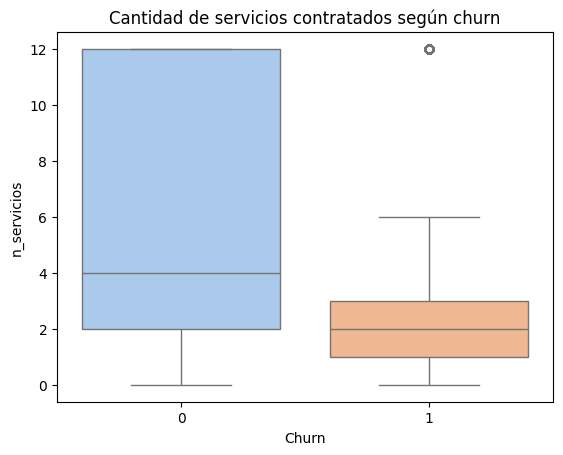

In [59]:
servicios = ['OnlineBackup', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
dataframenc['n_servicios'] = dataframenc[servicios].sum(axis=1)
sns.boxplot(data=dataframenc, x='Churn', y='n_servicios', palette='pastel')
plt.title('Cantidad de servicios contratados según churn')

In [60]:
pd.crosstab(dataframenc['Contract'], dataframenc['PaymentMethod'], values=dataframenc['Churn'], aggfunc='mean')


PaymentMethod,bank_transfer_(automatic),credit_card_(automatic),electronic_check,mailed_check
Contract,,,,
month-to-month,0.341256,0.327808,0.537297,0.315789
one_year,0.097187,0.103015,0.184438,0.068249
two_year,0.033688,0.022375,0.077381,0.007853


Los clientes con contrato month-to-month y método de pago electronic_check presentan la tasa de churn más alta (53.7%), lo cual indica un grupo de alto riesgo.

En contraste, los clientes con contrato two_year y método de pago mailed_check tienen la tasa de churn más baja (0.7%), mostrando un alto nivel de fidelidad.

En general, los contratos de mayor duración (one_year y two_year) están asociados con menores tasas de churn, independientemente del método de pago.

Métodos de pago automáticos, como bank_transfer o credit_card, tienden a estar asociados con menores tasas de churn, especialmente en contratos más largos.